In [ ]:
!pip install matplotlib



# Next Buy
### Predicting the next sale


In [ ]:
import pandas as pd
import numpy as np
import mathplotlib as plt



In [ ]:
data_df = pd.read_csv("data/Training Data.csv")
data_df

In [ ]:
data_df.head()


In [25]:
set(data_df['category']), len(set(data_df['category']))


({'Back to School',
  'Beauty Products',
  'Board Games',
  'Books',
  'Consumer Durables',
  'Ereaders',
  'Fashion',
  'Fitness',
  'Gaming',
  'Groceries',
  'Home Decor',
  'Kitchen cleaning Supplies',
  'Laptops',
  'Painiting Supplies',
  'Pet Supplies',
  'Phones',
  'TVs',
  'Toys'},
 18)

In [26]:
data_df['category'].unique()


array(['Phones', 'Fashion', 'Home Decor', 'Consumer Durables',
       'Back to School', 'Toys', 'Books', 'Groceries', 'Fitness',
       'Board Games', 'Painiting Supplies', 'Gaming', 'TVs', 'Laptops',
       'Beauty Products', 'Pet Supplies', 'Ereaders',
       'Kitchen cleaning Supplies'], dtype=object)

In [27]:
training_df = pd.read_csv('data/Training Data Target.csv')

In [28]:
training_df


,user_id,aov,category
0,13153,-9999,Phones
1,42853,-9999,Phones
2,30550,-9999,Phones
3,9797,-9999,Phones
4,8171,-9999,Phones
...,...,...,...
13240,49383,-9999,Fashion
13241,49590,-9999,Home Decor
13242,49799,-9999,Fitness
13243,49900,-9999,Fitness


In [29]:
training_df['aov'].unique()

array([-9999], dtype=int64)

In [30]:
phones_df = data_df(data_df['category']=="Phones")
phones_df


TypeError: 'DataFrame' object is not callable

In [31]:
phones_df = data_df[data_df['category'] == 'Phones']
phones_df

,user_id,aov,category
0,37327,29128.0,Phones
4,41260,16658.0,Phones
7,19360,10214.0,Phones
8,19360,16761.0,Phones
9,19360,6382.0,Phones
...,...,...,...
257371,9808,7021.0,Phones
257391,33050,5964.0,Phones
257400,28087,16828.0,Phones
257405,35741,18451.0,Phones


In [32]:
phones_df.len()

AttributeError: 'DataFrame' object has no attribute 'len'

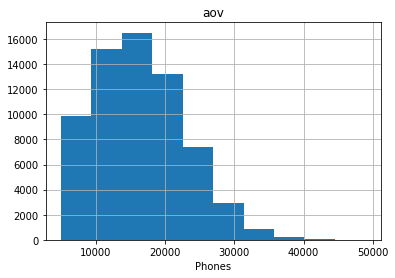

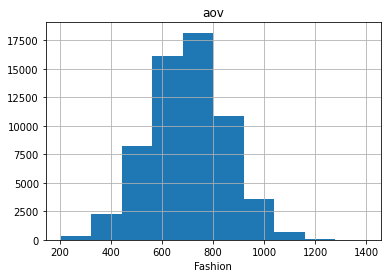

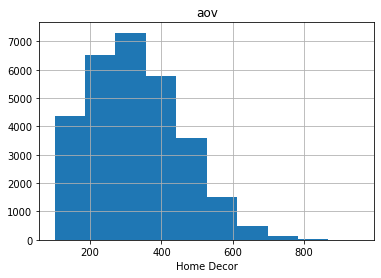

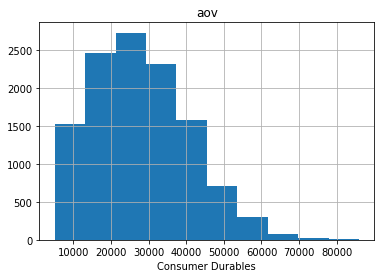

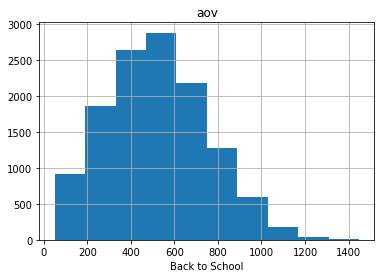

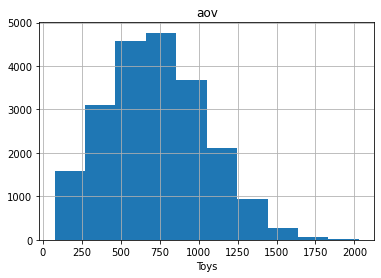

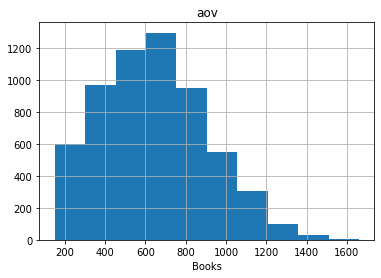

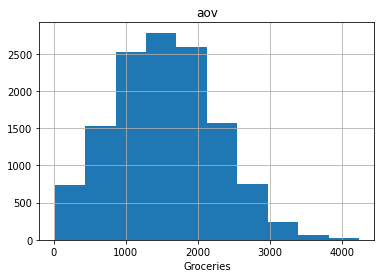

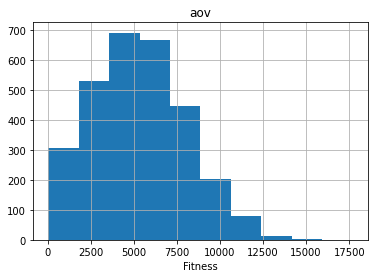

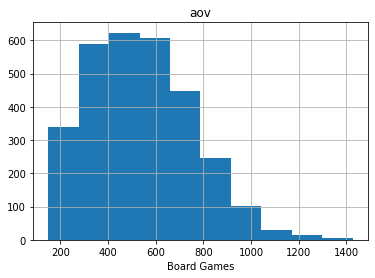

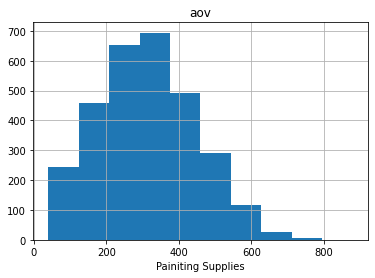

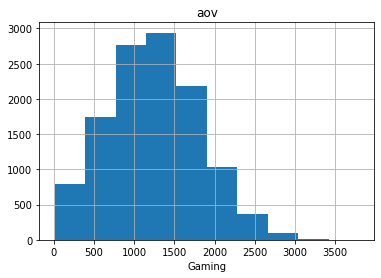

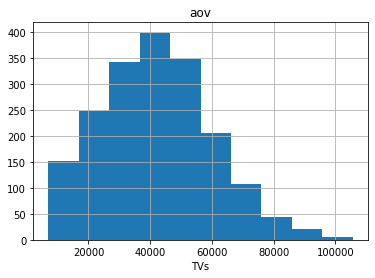

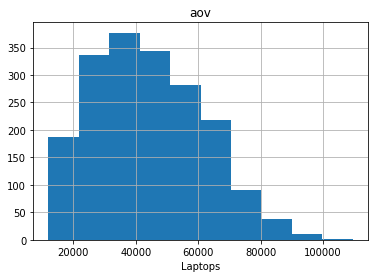

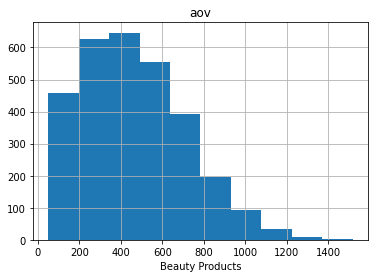

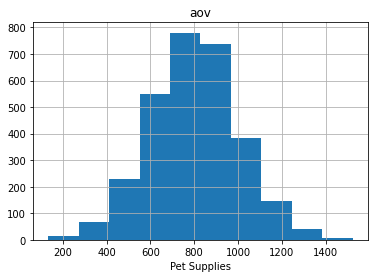

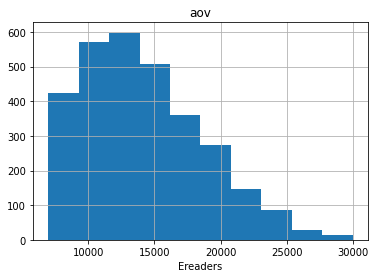

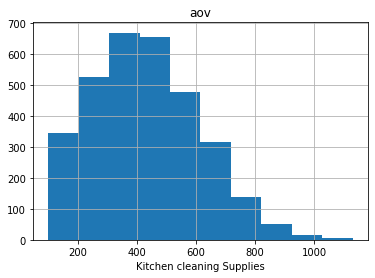

In [39]:
for category in data_df['category'].unique():
    plt = data_df[data_df['category'] == category].hist(column='aov', bins=10)
    plt[0][0].set_xlabel(category)
    

In [40]:
import numpy as np
np.random.seed(seed=1)
frequency_df = data_df.pivot_table(index='user_id', 
               columns='category',
               aggfunc='size',
               fill_value=0).iloc[np.random.randint(data_df['user_id'].unique().shape[0], size=11,)]
frequency_df

category,Back to School,Beauty Products,Board Games,Books,Consumer Durables,Ereaders,Fashion,Fitness,Gaming,Groceries,Home Decor,Kitchen cleaning Supplies,Laptops,Painiting Supplies,Pet Supplies,Phones,TVs,Toys
user_id,,,,,,,,,,,,,,,,,,
49617,0,0,1,0,0,0,2,0,1,0,0,1,0,0,0,0,0,1
377,1,0,0,0,0,0,1,0,1,1,2,0,0,0,0,1,0,2
20325,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,3,0,1
8601,0,0,0,0,0,0,2,0,1,1,1,0,0,0,0,1,0,0
28925,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,2,0,0
18296,1,0,0,0,1,1,1,0,1,0,1,0,0,0,0,2,0,3
13069,0,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0
32161,0,1,0,1,0,0,4,0,0,0,0,0,0,0,0,2,0,0
35704,0,0,0,0,1,0,3,0,1,1,2,0,0,0,0,5,1,2


In [44]:
!pip install scipy

In [45]:
from scipy.spatial import distance

candidate_user = frequency_df.iloc[0].tolist()
candidate_user_purchases = list(map(bool, candidate_user))
candidate_user = [item for item in candidate_user if item]
print(f"Candidate User: {candidate_user}\n")
print(f"Candidate User Purchase: {candidate_user_purchases}\n")

users_df = frequency_df.iloc[:, candidate_user_purchases]
similarity_df = pd.DataFrame(None)
for idx, row in users_df.iterrows():
    current_user = row.tolist()
#     print(current_user, candidate_user)

    eucl_dist = distance.euclidean(current_user, candidate_user)
    cosine_dist = distance.cosine(current_user, candidate_user)
    cosine_sim = 1 - cosine_dist

    similarity_df = similarity_df.append([{'user_id':idx, 'eucl_dist':eucl_dist, 'cosine_dist':cosine_dist, 'cosine_sim':cosine_sim}])
similarity_df = similarity_df.set_index('user_id')
similarity_df = similarity_df.fillna(0)
similarity_df

Candidate User: [1, 2, 1, 1, 1]

Candidate User Purchase: [False, False, True, False, False, False, True, False, True, False, False, True, False, False, False, False, False, True]



c:\users\mashh\appdata\local\programs\python\python39\lib\site-packages\scipy\spatial\distance.py:699: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


,eucl_dist,cosine_dist,cosine_sim
user_id,,,
49617,0.000000,0.000000,1.000000
377,2.000000,0.278312,0.721688
20325,1.732051,0.183503,0.816497
8601,1.732051,0.209431,0.790569
28925,2.828427,0.292893,0.707107
18296,2.645751,0.360398,0.639602
13069,2.000000,0.217376,0.782624
32161,2.828427,0.292893,0.707107
35704,2.000000,0.149580,0.850420


In [2]:
pandas.__version

NameError: name 'pandas' is not defined

In [ ]:
import pandas as pd
pd.__version


In [4]:
data = pd.read_csv("data/Training Data.csv")
data

,user_id,aov,category
0,37327,29128.0,Phones
1,37327,354.0,Fashion
2,37327,460.0,Home Decor
3,37327,761.0,Fashion
4,41260,16658.0,Phones
...,...,...,...
257402,29237,689.0,Fashion
257403,15197,2195.0,Groceries
257404,2114,559.0,Back to School
257405,35741,18451.0,Phones


In [ ]:
trail = data.groupby(['user_id', 'category'])['category']